In [ ]:
"""
try:
  !pip uninstall tb-nightly tensorboardX tensorboard
  !pip install tf-nightly
except Exception:
  pass
  """

Found existing installation: tensorboard 2.8.0
Uninstalling tensorboard-2.8.0:
  Would remove:
    /usr/local/bin/tensorboard
    /usr/local/lib/python3.7/dist-packages/tensorboard-2.8.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorboard/*
Proceed (y/n)? y
  Successfully uninstalled tensorboard-2.8.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 581.4 MB 23 kB/s 
     |████████████████████████████████| 1.7 MB 45.3 MB/s 
     |████████████████████████████████| 439 kB 59.5 MB/s 
     |████████████████████████████████| 5.9 MB 59.4 MB/s 
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.2+zzzcolab2022071

In [ ]:
import tensorflow as tf
import os
import datetime
import tensorflow_datasets as tfds

%load_ext tensorboard

In [ ]:
!rm -r /usr/local/lib/python3.6/dist-packages/tensorboardcolab.dist-info

rm: cannot remove '/usr/local/lib/python3.6/dist-packages/tensorboardcolab.dist-info': No such file or directory


In [ ]:
print(tf.__version__)

2.8.2


In [ ]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
dataset, info = tfds.load('amazon_us_reviews/Mobile_Electronics_v1_00',with_info = True)
train_dataset = dataset['train']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/104975 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/amazon_us_reviews/Mobile_Electronics_v1_00/0.1.0.incompleteRF8T15/amazon_us_re…

Dataset amazon_us_reviews downloaded and prepared to ~/tensorflow_datasets/amazon_us_reviews/Mobile_Electronics_v1_00/0.1.0. Subsequent calls will reuse this data.


In [ ]:
info

tfds.core.DatasetInfo(
    name='amazon_us_reviews',
    full_name='amazon_us_reviews/Mobile_Electronics_v1_00/0.1.0',
    description="""
    Amazon Customer Reviews (a.k.a. Product Reviews) is one of Amazons iconic products. In a period of over two decades since the first review in 1995, millions of Amazon customers have contributed over a hundred million reviews to express opinions and describe their experiences regarding products on the Amazon.com website. This makes Amazon Customer Reviews a rich source of information for academic researchers in the fields of Natural Language Processing (NLP), Information Retrieval (IR), and Machine Learning (ML), amongst others. Accordingly, we are releasing this data to further research in multiple disciplines related to understanding customer product experiences. Specifically, this dataset was constructed to represent a sample of customer evaluations and opinions, variation in the perception of a product across geographical regions, and promoti

In [ ]:
print(train_dataset)

<PrefetchDataset element_spec={'data': {'customer_id': TensorSpec(shape=(), dtype=tf.string, name=None), 'helpful_votes': TensorSpec(shape=(), dtype=tf.int32, name=None), 'marketplace': TensorSpec(shape=(), dtype=tf.string, name=None), 'product_category': TensorSpec(shape=(), dtype=tf.string, name=None), 'product_id': TensorSpec(shape=(), dtype=tf.string, name=None), 'product_parent': TensorSpec(shape=(), dtype=tf.string, name=None), 'product_title': TensorSpec(shape=(), dtype=tf.string, name=None), 'review_body': TensorSpec(shape=(), dtype=tf.string, name=None), 'review_date': TensorSpec(shape=(), dtype=tf.string, name=None), 'review_headline': TensorSpec(shape=(), dtype=tf.string, name=None), 'review_id': TensorSpec(shape=(), dtype=tf.string, name=None), 'star_rating': TensorSpec(shape=(), dtype=tf.int32, name=None), 'total_votes': TensorSpec(shape=(), dtype=tf.int32, name=None), 'verified_purchase': TensorSpec(shape=(), dtype=tf.int64, name=None), 'vine': TensorSpec(shape=(), dtype=

In [ ]:
len(list(train_dataset))

104975

In [ ]:
BUFFER_SIZE = 30000
BATCH_SIZE = 128

In [ ]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE, reshuffle_each_iteration = False)

In [ ]:
for reviews in train_dataset.take(2):
  print(reviews)

{'data': {'customer_id': <tf.Tensor: shape=(), dtype=string, numpy=b'7611936'>, 'helpful_votes': <tf.Tensor: shape=(), dtype=int32, numpy=1>, 'marketplace': <tf.Tensor: shape=(), dtype=string, numpy=b'US'>, 'product_category': <tf.Tensor: shape=(), dtype=string, numpy=b'Mobile_Electronics'>, 'product_id': <tf.Tensor: shape=(), dtype=string, numpy=b'B00HZE7ZK2'>, 'product_parent': <tf.Tensor: shape=(), dtype=string, numpy=b'624337832'>, 'product_title': <tf.Tensor: shape=(), dtype=string, numpy=b'DBPOWER\xc2\xae Portable DVD Player with Swivel Screen, Supports SD Card and USB, Direct Play in Formats MP4/AVI/RMVB/MP3/JPEG'>, 'review_body': <tf.Tensor: shape=(), dtype=string, numpy=b'Great little machine.Good clear picture and sound,Easy set up, I enjoy the remote and the instructions are easy to follow.'>, 'review_date': <tf.Tensor: shape=(), dtype=string, numpy=b'2014-11-19'>, 'review_headline': <tf.Tensor: shape=(), dtype=string, numpy=b'Bright and Right'>, 'review_id': <tf.Tensor: sha

In [ ]:
for reviews in train_dataset.take(10):
  review_text = reviews['data']
  print(review_text.get('review_body').numpy())
  print(review_text.get('star_rating'))
  print(tf.where(review_text.get('star_rating')>3,1,0).numpy())

b'Great little machine.Good clear picture and sound,Easy set up, I enjoy the remote and the instructions are easy to follow.'
tf.Tensor(5, shape=(), dtype=int32)
1
b'Brought  the same protector before. happy with my purchase and would use this buyer again when I need to order a new one.'
tf.Tensor(4, shape=(), dtype=int32)
1
b'I love it. Use it all of the time. Easy to use. Excellent buy for the price.'
tf.Tensor(5, shape=(), dtype=int32)
1
b"The quality of the camera is so cheap, I just got the camera for couple day and it doesn't work anymore. It says error, can't record anymore."
tf.Tensor(1, shape=(), dtype=int32)
0
b'I cant seem to find a software that works flawlessly with this thing.I have tried MusicMatch,Media Monkey,Media Jukebox,Rhapsody and they all tend to freeze up when loading songs on to this thing,so I am assuming it is a flaw in the product.Other than that it sounds decent,its little enough to put anywhere,although it is a tad bulky for its size.It only holds like 150

In [ ]:
tokenizer = tfds.deprecated.text.Tokenizer()

vocabulary_set = set()
for _, reviews in train_dataset.enumerate():
  review_text = reviews['data']
  reviews_tokens = tokenizer.tokenize(review_text.get('review_body').numpy())
  vocabulary_set.update(reviews_tokens)

vocab_size = len(vocabulary_set)
vocab_size

73738

In [ ]:
encoder = tfds.deprecated.text.TokenTextEncoder(vocabulary_set)

In [ ]:
print(vocabulary_set)

{'Quickly', 'Ozarks', 'riptunes', 'perforated', 'crear', 'sideburn', 'loudly', 'Tiltbook', 'acurade', 'fingertip', 'Sleeves', 'repunch', 'poly', 'La', 'reap', 'somwhere', 'phenolic', 'firm', 'creative', '20W', 'istall', 'tention', 'X001', 'stutters', 'visuals', 'woking', 'bagpipes', '53', 'Finished', 'amiplify', 'optimizations', 'abliity', 'profanities', 'guaranteed', 'iffy', 'con', 'tel', 'Hummingbirds', 'hush', 'conveniente', 'grad', 'discoveries', 'industrial', 'scribe', 'innstead', '39hz', 'spashed', 'Judging', 'pilas', 'meantime', 'tradition', 'sunk', 'Theoretically', 'conductors', 'hdn', '400V', 'overboard', 'rings', 'sideload', '8100T', 'Overland', 'itd', '156', '13old', 'itll', 'IKQFMT4', 'tupdate', '325ic', 'birdies', 'anywere', '10w3v2', 'needlnose', 'Passion', 'contradicting', 'upping', 'tackiness', 'DESTROYED', '60hz', 'dilema', 'CONSIGUEN', 'irritating', 'cubical', 'Dura', 'DELIVERY', 'B0013FSL3E', 'bussle', 'hunks', 'monetarily', 'link', 'BigLots', 'COMPRE', 'anf', 'Filte

In [ ]:
for reviews in train_dataset.take(5):
  review_text = reviews['data']
  print(review_text.get('review_body').numpy())
  encoded_example = encoder.encode(review_text.get('review_body').numpy())
  print(encoded_example)

b'Great little machine.Good clear picture and sound,Easy set up, I enjoy the remote and the instructions are easy to follow.'
[34164, 21167, 49014, 34583, 15718, 43183, 11909, 50940, 53011, 33574, 59202, 1029, 48235, 46586, 62229, 11909, 46586, 13123, 73233, 40975, 47746, 50249]
b'Brought  the same protector before. happy with my purchase and would use this buyer again when I need to order a new one.'
[49183, 46586, 72333, 29056, 33442, 28334, 52196, 18669, 36800, 11909, 58501, 36606, 49265, 34782, 67974, 53323, 1029, 53829, 47746, 12122, 4559, 73128, 37031]
b'I love it. Use it all of the time. Easy to use. Excellent buy for the price.'
[1029, 60596, 30897, 62379, 30897, 34118, 16061, 46586, 52188, 53011, 47746, 36606, 40446, 27777, 68200, 46586, 59768]
b"The quality of the camera is so cheap, I just got the camera for couple day and it doesn't work anymore. It says error, can't record anymore."
[4407, 5063, 16061, 46586, 49740, 5121, 10057, 15504, 1029, 33500, 4409, 46586, 49740, 6820

In [ ]:
for index in encoded_example:
  print('{} ----> {}'.format(index,encoder.decode([index])))

1029 ----> I
19886 ----> cant
25079 ----> seem
47746 ----> to
36838 ----> find
4559 ----> a
19997 ----> software
58293 ----> that
49346 ----> works
7986 ----> flawlessly
52196 ----> with
49265 ----> this
7996 ----> thing
1029 ----> I
62856 ----> have
37714 ----> tried
22135 ----> MusicMatch
10315 ----> Media
14135 ----> Monkey
10315 ----> Media
6627 ----> Jukebox
6427 ----> Rhapsody
11909 ----> and
50041 ----> they
34118 ----> all
72180 ----> tend
47746 ----> to
32773 ----> freeze
59202 ----> up
53323 ----> when
12181 ----> loading
29277 ----> songs
55361 ----> on
47746 ----> to
49265 ----> this
7996 ----> thing
10057 ----> so
1029 ----> I
36421 ----> am
63064 ----> assuming
30897 ----> it
5121 ----> is
4559 ----> a
50890 ----> flaw
14043 ----> in
46586 ----> the
17779 ----> product
62287 ----> Other
42698 ----> than
58293 ----> that
30897 ----> it
55795 ----> sounds
53786 ----> decent
23065 ----> its
21167 ----> little
31127 ----> enough
47746 ----> to
11245 ----> put
31340 ----> anyw

In [ ]:
def encode(text_tensor, label_tensor):
  encoded_text = encoder.encode(text_tensor.numpy())
  label = tf.where(label_tensor>3,1,0)
  return encoded_text, label

In [ ]:
def encode_map_fn(tensor):

  text = tensor['data'].get('review_body')
  label = tensor['data'].get('star_rating')

  encoded_text, label = tf.py_function(encode,inp=[text, label],Tout = (tf.int64, tf.int32))
  encoded_text.set_shape([None])
  label.set_shape([])

  return encoded_text, label

In [ ]:
ar_encoded_data = train_dataset.map(encode_map_fn)

In [ ]:
for f0,f1 in ar_encoded_data.take(2):
  print(f0)
  print(f1)

tf.Tensor(
[34164 21167 49014 34583 15718 43183 11909 50940 53011 33574 59202  1029
 48235 46586 62229 11909 46586 13123 73233 40975 47746 50249], shape=(22,), dtype=int64)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(
[49183 46586 72333 29056 33442 28334 52196 18669 36800 11909 58501 36606
 49265 34782 67974 53323  1029 53829 47746 12122  4559 73128 37031], shape=(23,), dtype=int64)
tf.Tensor(1, shape=(), dtype=int32)


In [ ]:
TAKE_SIZE = 10000

train_data = ar_encoded_data.skip(TAKE_SIZE).shuffle(BUFFER_SIZE)
train_data = train_data.padded_batch(BATCH_SIZE)

test_data = ar_encoded_data.take(TAKE_SIZE)
test_data = test_data.padded_batch(BATCH_SIZE)

In [ ]:
vocab_size += 1

In [ ]:
sample_text, sample_labels = next(iter(test_data))

sample_text[0], sample_labels[0]

(<tf.Tensor: shape=(791,), dtype=int64, numpy=
 array([34164, 21167, 49014, 34583, 15718, 43183, 11909, 50940, 53011,
        33574, 59202,  1029, 48235, 46586, 62229, 11909, 46586, 13123,
        73233, 40975, 47746, 50249,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,  

In [ ]:
for f0, f1 in test_data.take(10):
  print(tf.unique_with_counts(f1)[2].numpy())

[86 42]
[83 45]
[38 90]
[37 91]
[90 38]
[83 45]
[86 42]
[33 95]
[40 88]
[46 82]


In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size,128))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences = True)))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)))

for units in [64,64]:
  model.add(tf.keras.layers.Dense(units, activation = 'relu'))

model.add(tf.keras.layers.Dense(1))

In [ ]:
#model.summary()

In [ ]:
!rm -r /tmp/logs/

rm: cannot remove '/tmp/logs/': No such file or directory


In [ ]:
logdir = os.path.join("/tmp/logs",datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir,histogram_freq = 1)
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath = '/tmp/sentiment_analysis.hdf5',verbose = 1, save_best_only = True)

model.compile(optimizer = 'adam',
              loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
              metrics = ['accuracy'])

In [ ]:
history = model.fit(train_data, epochs = 4, validation_data = test_data, callbacks = [tensorboard_callback,checkpointer])

Epoch 1/4
742/742 [==============================] - ETA: 0s - loss: 0.3899 - accuracy: 0.8214
Epoch 1: val_loss improved from inf to 0.37844, saving model to /tmp/sentiment_analysis.hdfs


INFO:tensorflow:Assets written to: /tmp/sentiment_analysis.hdfs/assets


INFO:tensorflow:Assets written to: /tmp/sentiment_analysis.hdfs/assets


742/742 [==============================] - 255s 296ms/step - loss: 0.3899 - accuracy: 0.8214 - val_loss: 0.3784 - val_accuracy: 0.8622
Epoch 2/4
742/742 [==============================] - ETA: 0s - loss: 0.2642 - accuracy: 0.8895
Epoch 2: val_loss improved from 0.37844 to 0.28294, saving model to /tmp/sentiment_analysis.hdfs


INFO:tensorflow:Assets written to: /tmp/sentiment_analysis.hdfs/assets


INFO:tensorflow:Assets written to: /tmp/sentiment_analysis.hdfs/assets


742/742 [==============================] - 265s 309ms/step - loss: 0.2642 - accuracy: 0.8895 - val_loss: 0.2829 - val_accuracy: 0.8848
Epoch 3/4
742/742 [==============================] - ETA: 0s - loss: 0.1970 - accuracy: 0.9212
Epoch 3: val_loss did not improve from 0.28294
742/742 [==============================] - 240s 274ms/step - loss: 0.1970 - accuracy: 0.9212 - val_loss: 0.2932 - val_accuracy: 0.8876
Epoch 4/4
742/742 [==============================] - ETA: 0s - loss: 0.1530 - accuracy: 0.9413
Epoch 4: val_loss did not improve from 0.28294
742/742 [==============================] - 240s 275ms/step - loss: 0.1530 - accuracy: 0.9413 - val_loss: 0.3205 - val_accuracy: 0.8866


In [ ]:
model.save('/tmp/final_sentiment_analysis.hdf5')

In [ ]:
!ls -alrt /tmp/*.hdf5

-rw-r--r-- 1 root root 118635376 Aug  9 21:12 /tmp/final_sentiment_analysis.hdf5


In [ ]:
eval_loss,eval_acc = model.evaluate(test_data)

79/79 [==============================] - 15s 187ms/step - loss: 0.3205 - accuracy: 0.8866


In [ ]:
print('\nEval loss: {:.3f}, Eval accuracy: {:.3f}'.format(eval_loss,eval_acc))


Eval loss: 0.321, Eval accuracy: 0.887


In [ ]:
for f0,f1 in test_data.take(1):
  print(f1)
  print(model.predict(f0))

tf.Tensor(
[1 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 0 1
 1 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1
 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0
 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1], shape=(128,), dtype=int32)
[[ 6.301483  ]
 [ 4.530282  ]
 [ 5.857961  ]
 [-4.722616  ]
 [ 0.7015546 ]
 [-4.7670565 ]
 [ 3.0051837 ]
 [-4.8903832 ]
 [ 6.111027  ]
 [-1.7802286 ]
 [-0.37354633]
 [ 5.593647  ]
 [-2.6834412 ]
 [ 5.1450644 ]
 [-1.7863494 ]
 [ 2.461958  ]
 [-0.18688723]
 [ 0.47797832]
 [ 1.4550563 ]
 [ 4.720837  ]
 [-4.9770875 ]
 [-1.6646043 ]
 [ 3.9686446 ]
 [-5.0083833 ]
 [-4.879824  ]
 [-5.464307  ]
 [ 2.8163104 ]
 [ 5.7514577 ]
 [ 2.4592898 ]
 [-4.9777822 ]
 [ 2.1856477 ]
 [ 5.262419  ]
 [ 5.6626425 ]
 [ 5.398431  ]
 [ 3.137232  ]
 [-0.19030532]
 [ 5.7805843 ]
 [ 5.9018035 ]
 [-5.6935487 ]
 [-5.1330557 ]
 [-0.5040723 ]
 [ 5.321979  ]
 [-3.517591  ]
 [ 3.948467  ]
 [ 5.122975  ]
 [-0.12838414]
 [ 2.23983

In [ ]:
model.layers

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         9438592   
                                                                 
 bidirectional (Bidirectiona  (None, None, 256)        263168    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 6

In [ ]:
model.get_layer('embedding').output

<KerasTensor: shape=(None, None, 128) dtype=float32 (created by layer 'embedding')>

In [ ]:
!nvidia-smi

Tue Aug  9 21:22:12 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P0    29W /  70W |   8904MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history,metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric],'')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric,'val_'+metric])
  plt.show

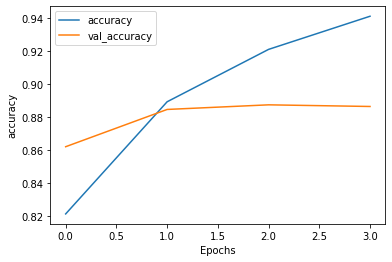

In [ ]:
plot_graphs(history, 'accuracy')

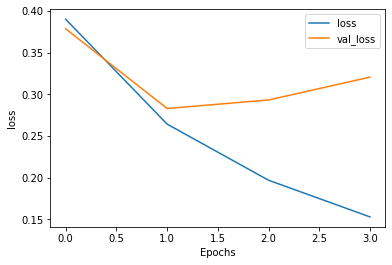

In [ ]:
plot_graphs(history, 'loss')

In [ ]:
tf.keras.backend.clear_session()
sa_load = tf.keras.models.load_model('/tmp/final_sentiment_analysis.hdf5',compile = False)

In [ ]:
def pad_to_size(vec, size):
  zeros = [0] * (size - len(vec))
  vec.extend(zeros)
  return vec

In [ ]:
def predict(pred_text):
  encoded_pred_text = encoder.encode(pred_text)
  print(encoded_pred_text)
  encoded_pred_text = pad_to_size(encoded_pred_text,32)
  print(encoded_pred_text)
  encoded_pred_text = tf.cast(encoded_pred_text, tf.float32)
  predictions = sa_load.predict(tf.expand_dims(encoded_pred_text,0))

  return (predictions)

In [ ]:
pred_text = ('This watch is pretty bad. Color and dial looks pathetic.')
predictions = predict(pred_text)
print(predictions)

[14116, 30189, 5121, 42749, 51241, 23605, 11909, 4299, 63382, 42021]
[14116, 30189, 5121, 42749, 51241, 23605, 11909, 4299, 63382, 42021, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[[-4.402755]]


In [ ]:
pred_text = ('Amazing product. Fast delivery .Nice packing')
predictions = predict(pred_text)
print(predictions)

[53811, 17779, 7106, 59409, 60196, 2285]
[53811, 17779, 7106, 59409, 60196, 2285, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[[6.315232]]
